In [1]:
import pymysql
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sqlalchemy import create_engine

# Database connection parameters
DATABASE_TYPE = 'mysql'      # or 'postgresql', 'sqlite', etc.
DBAPI = 'pymysql'            # or 'psycopg2' for PostgreSQL, 'sqlite3' for SQLite
HOST = 'localhost'           # Database server address or IP
USER = 'root'            # Your database username
PASSWORD = '$sql.26'        # Your database password
DATABASE = 'media_interaction_db'   # Your database name
PORT = 3306                  # Default MySQL port (use appropriate port for other databases)

# Create SQLAlchemy engine
engine = create_engine(f'{DATABASE_TYPE}+{DBAPI}://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}')

In [3]:
# Test connection by listing available tables
with engine.connect() as connection:
    result = connection.execute("SHOW TABLES;")  # For MySQL; use appropriate query for other DBs
    tables = result.fetchall()
    print("Tables in the database:", tables)

Tables in the database: [('media_interaction_data',)]


In [4]:
import pandas as pd

In [12]:
##-----------------TOP HASHTAGS BY RETWEETS--------------------------------------
query3="""
select HASHTAGS , AVG(RETWEETS) as AVG_RETWEETS
from media_interaction_data
group by HASHTAGS
order by AVG_RETWEETS desc
limit 20;
"""
df3=pd.read_sql(query3,engine)
print(df3)

                                        HASHTAGS  AVG_RETWEETS
0      #Elation #RareBookDiscovery                        40.0
1                           #Joy #EndlessSmiles           40.0
2     #Thrill #CulturalCelebration                        40.0
3     #Motivation #FitnessGoals                           40.0
4                        #Emotion #AdeleConcert           40.0
5           #Mesmerizing #NightDancePerformance           40.0
6        #Despair #AbyssOfHeartache                       40.0
7                    #Tranquility #SunsetBeauty           40.0
8      #Anticipation #AdventureAwaits                     40.0
9                         #Joy #WorldCupTriumph           40.0
10                    #Enthusiasm #JustinBieber           40.0
11               #Disappointment #SoccerDefeats           40.0
12            #Excitement #MoviePremiereThrills           40.0
13                          #Joy #SimpleMoments           40.0
14      #Wonder #StargazingAdventure                   

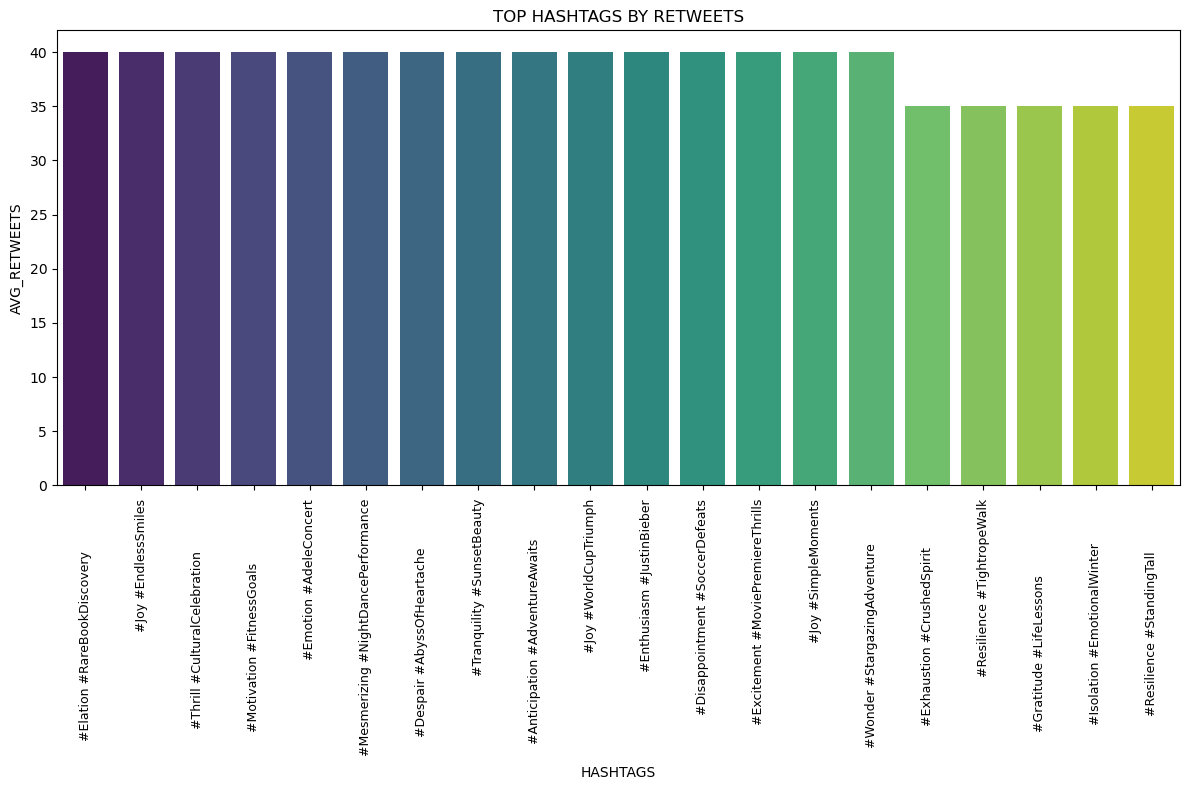

In [13]:
#using Horizontal Line plot
plt.figure(figsize=(12,8))
sns.barplot(x='HASHTAGS',y='AVG_RETWEETS',data=df3,palette='viridis')
plt.xlabel('HASHTAGS')
plt.ylabel('AVG_RETWEETS')
plt.title('TOP HASHTAGS BY RETWEETS')
plt.xticks(rotation=90,fontsize=9)
plt.tight_layout()
plt.show()

In [14]:
#---------------------SENTIMENT TRENDS OVERTIME-----------------------------
query5="""
select SENTIMENT,year,COUNT(*) as COUNT
from media_interaction_data
group by year,SENTIMENT
order by year desc,SENTIMENT
limit 200;
"""
df5=pd.read_sql(query5,engine)
print(df5)

                  SENTIMENT  year  COUNT
0             Acceptance     2023      6
1          Acceptance        2023      6
2             Admiration     2023      4
3             Adoration      2023      4
4             Affection      2023      4
5                Amazement   2023      2
6             Amusement      2023      4
7             Anger          2023      4
8             Anticipation   2023      4
9             Apprehensive   2023      2
10            Awe            2023      4
11                     Bad   2023     12
12            Bitter         2023      6
13                 Boredom   2023      2
14            Calmness       2023      6
15               Confusion   2023      2
16            Confusion      2023      4
17             Contentment   2023     18
18           Contentment     2023      2
19    Creative Inspiration   2023      2
20               Curiosity   2023     12
21         Curiosity         2023      2
22           Determination   2023      2
23            Di

In [15]:
print(df5['SENTIMENT'].unique())

[' Acceptance   ' ' Acceptance      ' ' Admiration   ' ' Adoration    '
 ' Affection    ' ' Amazement ' ' Amusement    ' ' Anger        '
 ' Anticipation ' ' Apprehensive ' ' Awe          ' ' Bad '
 ' Bitter       ' ' Boredom ' ' Calmness     ' ' Confusion '
 ' Confusion    ' ' Contentment ' ' Contentment   '
 ' Creative Inspiration ' ' Curiosity ' ' Curiosity       '
 ' Determination ' ' Disappointed ' ' Disgust ' ' Disgust      '
 ' Ecstasy ' ' Embarrassed ' ' Empathetic ' ' Enjoyment    ' ' Euphoria '
 ' Excitement ' ' Excitement   ' ' Excitement    ' ' Fear         '
 ' Fearful ' ' Frustration ' ' Grateful ' ' Gratitude ' ' Gratitude    '
 ' Grief ' ' Happiness    ' ' Happy ' ' Hate ' ' Hopeful '
 ' Indifference ' ' Indifference    ' ' Joy ' ' Joy          '
 ' Joy in Baking ' ' Kind         ' ' Loss ' ' Love         '
 ' Mischievous ' ' Negative  ' ' Neutral ' ' Neutral   ' ' Pensive '
 ' Positive ' ' Positive  ' ' Pride ' ' Pride        ' ' Reflection    '
 ' Relief ' ' Sad ' ' S

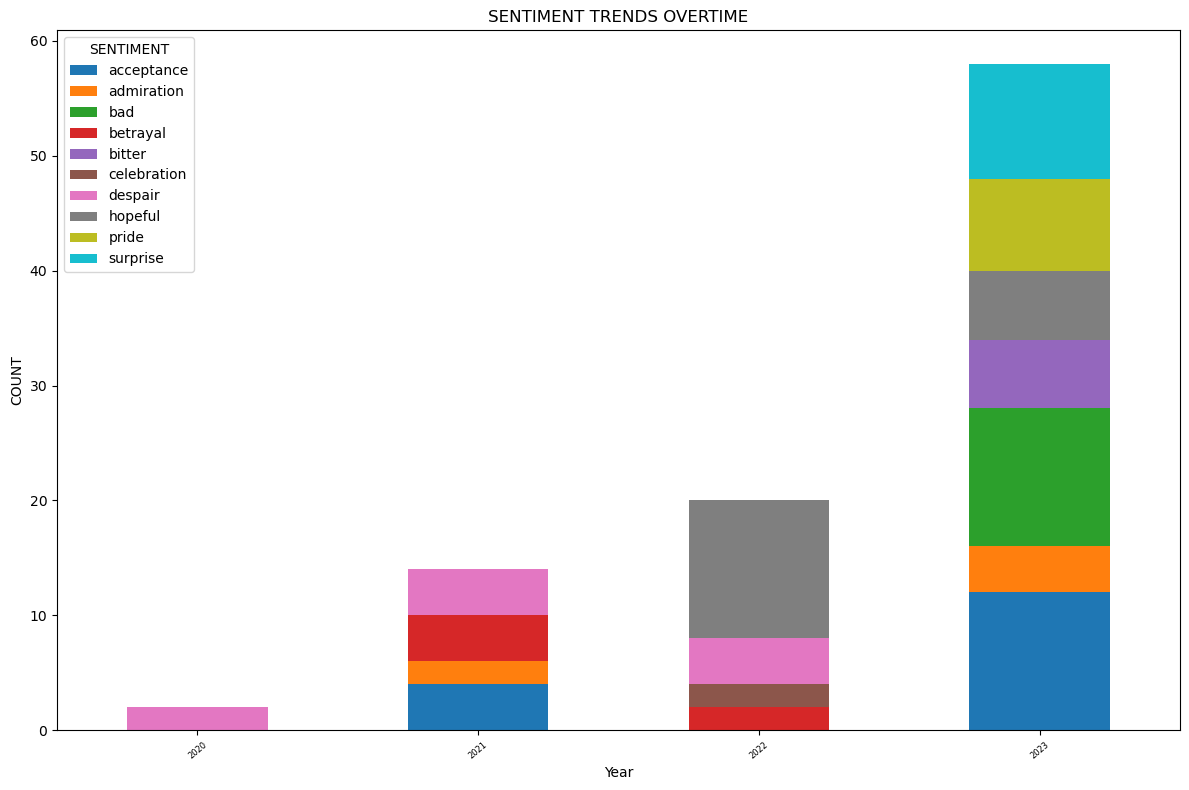

In [16]:
df5['SENTIMENT'] = df5['SENTIMENT'].str.strip().str.lower()

select_senti=[senti.lower() for senti in['Despair','Celebration','Betrayal','Surprise','Acceptance',
                                         'Admiration','Bitter','Bad','Pride','Hopeful']]

filtered_df = df5[df5['SENTIMENT'].isin(select_senti)]

if filtered_df.empty:
    print("No data available for the selected sentiments.")
else:
    senti_df = filtered_df.pivot_table(values='COUNT', index='year', columns='SENTIMENT', aggfunc='sum')
    senti_df.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('SENTIMENT TRENDS OVERTIME')
plt.xlabel('Year')
plt.ylabel('COUNT')
plt.legend(title='SENTIMENT')
plt.xticks(rotation=40,fontsize=6)
plt.tight_layout()
plt.show()

In [17]:
#-------------------------SENTIMENT WITH HIGHEST RETWEET OVERTIME-------------------
query6="""
select SENTIMENT, year ,AVG(RETWEETS) as AVG_RETWEETS
from media_interaction_data
group by year, SENTIMENT
order BY year desc, AVG_RETWEETS desc, SENTIMENT
limit 200;
"""
df6=pd.read_sql(query6,engine)
print(df6)

                  SENTIMENT  year  AVG_RETWEETS
0                  Ecstasy   2023       35.0000
1                 Euphoria   2023       35.0000
2                Amazement   2023       30.0000
3                Confusion   2023       30.0000
4            Excitement      2023       30.0000
5                    Grief   2023       30.0000
6             Happiness      2023       30.0000
7              Mischievous   2023       29.0000
8                     Loss   2023       28.0000
9                 Positive   2023       28.0000
10            Satisfaction   2023       28.0000
11               Gratitude   2023       27.5000
12             Contentment   2023       27.1111
13            Confusion      2023       25.0000
14           Contentment     2023       25.0000
15               Curiosity   2023       25.0000
16            Enjoyment      2023       25.0000
17                   Pride   2023       25.0000
18            Sadness        2023       25.0000
19            Surprise       2023       

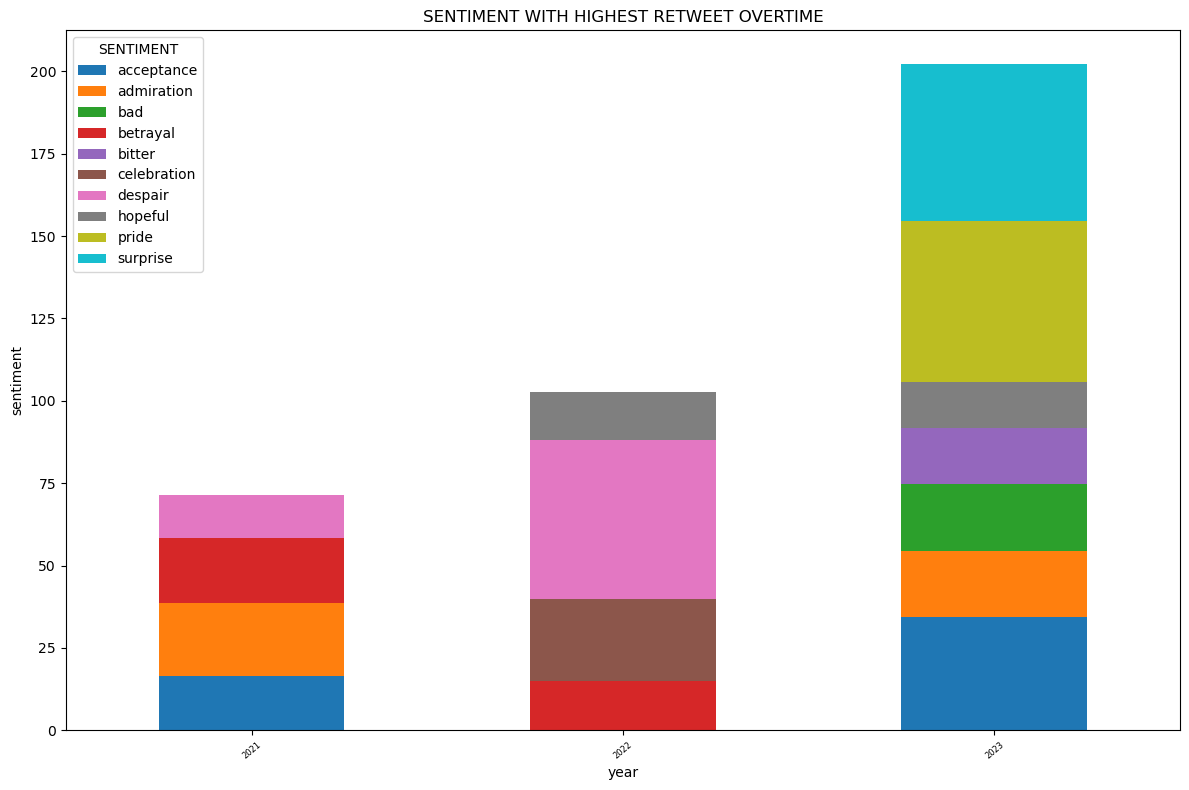

In [18]:
#USING STACKED BAR GARPH
df6['SENTIMENT'] = df6['SENTIMENT'].str.strip().str.lower()

selectd_senti=[senti.lower() for senti in['Despair','Celebration','Betrayal','Surprise','Acceptance',
                                         'Admiration','Bitter','Bad','Pride','Hopeful']]

filter_df = df6[df6['SENTIMENT'].isin(selectd_senti)]

if filter_df.empty:
    print("No data available for the selected sentiments.")
else:
    sentiment_df = filter_df.pivot_table(values='AVG_RETWEETS', index='year', columns='SENTIMENT', aggfunc='sum')
    sentiment_df.plot(kind='bar', stacked=True, figsize=(12, 8))
    
plt.title('SENTIMENT WITH HIGHEST RETWEET OVERTIME')
plt.xlabel('year')
plt.ylabel('sentiment')
plt.legend(title='SENTIMENT')
plt.xticks(rotation=40,fontsize=6)
plt.tight_layout()
plt.show()